In [75]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time 

In [76]:
pop = pd.read_csv('european_cities.csv')
pop

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13
...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12


In [77]:
pop.shape

(105, 5)

In [78]:
#查看基本信息
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [79]:
#查看变量描述
pop.describe(include='all')

,Rank,City,State,Population,Date of census/estimate
count,105.000000,105,105,105,105
unique,NaN,105,24,105,29
top,NaN,Budapest,Germany,"898,095",30-Jun-12
freq,NaN,1,19,1,17
mean,53.057143,NaN,NaN,NaN,NaN
std,30.428298,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN
50%,53.000000,NaN,NaN,NaN,NaN
75%,79.000000,NaN,NaN,NaN,NaN


In [80]:
pop['State'].values

array([' United Kingdom', ' Germany', ' Spain', ' Italy', ' France',
       ' Romania', ' Austria', ' Germany', ' Hungary', ' Poland',
       ' Spain', ' Germany', ' Italy', ' Bulgaria', ' Czech Republic',
       ' Belgium', ' United Kingdom', ' Germany', ' Italy', ' Sweden',
       ' Italy', ' France', ' Netherlands', ' Croatia', ' Spain',
       ' Poland', ' United Kingdom', ' Poland', ' Germany', ' Latvia',
       ' Spain', ' Italy', ' Spain', ' Greece', ' Poland', ' Netherlands',
       ' Finland', ' Germany', ' United Kingdom', ' Italy', ' Germany',
       ' Germany', ' Germany', ' Spain', ' Denmark', ' United Kingdom',
       ' Portugal', ' Poland', ' Germany', ' Lithuania', ' Germany',
       ' Germany', ' Sweden', ' Ireland', ' United Kingdom', ' Germany',
       ' Netherlands', ' United Kingdom', ' Belgium', ' United Kingdom',
       ' Germany', ' Germany', ' France', ' United Kingdom', ' Poland',
       ' France', ' Spain', ' Estonia', ' United Kingdom',
       'Slovakia Slov

In [81]:
pop['State'] = pop['State'].str.strip()
pop['State'].values

array(['United Kingdom', 'Germany', 'Spain', 'Italy', 'France', 'Romania',
       'Austria', 'Germany', 'Hungary', 'Poland', 'Spain', 'Germany',
       'Italy', 'Bulgaria', 'Czech Republic', 'Belgium', 'United Kingdom',
       'Germany', 'Italy', 'Sweden', 'Italy', 'France', 'Netherlands',
       'Croatia', 'Spain', 'Poland', 'United Kingdom', 'Poland',
       'Germany', 'Latvia', 'Spain', 'Italy', 'Spain', 'Greece', 'Poland',
       'Netherlands', 'Finland', 'Germany', 'United Kingdom', 'Italy',
       'Germany', 'Germany', 'Germany', 'Spain', 'Denmark',
       'United Kingdom', 'Portugal', 'Poland', 'Germany', 'Lithuania',
       'Germany', 'Germany', 'Sweden', 'Ireland', 'United Kingdom',
       'Germany', 'Netherlands', 'United Kingdom', 'Belgium',
       'United Kingdom', 'Germany', 'Germany', 'France', 'United Kingdom',
       'Poland', 'France', 'Spain', 'Estonia', 'United Kingdom',
       'Slovakia Slovak Republic', 'Poland', 'Spain', 'Italy', 'Spain',
       'Italy', 'Czech Re

In [82]:
pop.Population.str.replace(',','').astype(np.int64)

0      8615246
1      3437916
2      3165235
3      2872086
4      2273305
        ...   
100     309869
101     309105
102     308735
103     308269
104     306888
Name: Population, Length: 105, dtype: int64

In [83]:
pop['NO_population']=pop.Population.str.replace(',','').astype(np.int64)
pop.head()

,Rank,City,State,Population,Date of census/estimate,NO_population
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14,8615246
1,2,Berlin,Germany,"3,437,916",31-May-14,3437916
2,3,Madrid,Spain,"3,165,235",1-Jan-14,3165235
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086
4,5,Paris,France,"2,273,305",1-Jan-13,2273305


In [84]:
pd.to_datetime(pop['Date of census/estimate'],dayfirst=True)

0     2014-06-01
1     2014-05-31
2     2014-01-01
3     2014-09-30
4     2013-01-01
         ...    
100   2012-12-31
101   2013-03-31
102   2012-06-30
103   2012-06-30
104   2013-01-01
Name: Date of census/estimate, Length: 105, dtype: datetime64[ns]

In [85]:
pop['NO_Date of census/estimate']= pd.to_datetime(pop['Date of census/estimate'],dayfirst=True)
pop

,Rank,City,State,Population,Date of census/estimate,NO_population,NO_Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14,8615246,2014-06-01
1,2,Berlin,Germany,"3,437,916",31-May-14,3437916,2014-05-31
2,3,Madrid,Spain,"3,165,235",1-Jan-14,3165235,2014-01-01
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086,2014-09-30
4,5,Paris,France,"2,273,305",1-Jan-13,2273305,2013-01-01
...,...,...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31-Dec-12,309869,2012-12-31
101,102,Malmö,Sweden,"309,105",31-Mar-13,309105,2013-03-31
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12,308735,2012-06-30
103,104,Katowice,Poland,"308,269",30-Jun-12,308269,2012-06-30


In [86]:
pop.sort_values(by=['NO_Date of census/estimate','NO_population'],ascending = True) #sort_index

,Rank,City,State,Population,Date of census/estimate,NO_population,NO_Date of census/estimate
81,82,Nice,France,"343,304",31-Dec-10,343304,2010-12-31
65,66,Toulouse,France,"441,802",31-Dec-10,441802,2010-12-31
62,63,Lyon,France,"484,344",31-Dec-10,484344,2010-12-31
46,47,Lisbon,Portugal,"547,631",1-Jan-11,547631,2011-01-01
23,24,Zagreb,Croatia,"790,017",31-Mar-11,790017,2011-03-31
...,...,...,...,...,...,...,...
3,4,Rome,Italy,"2,872,086",30-Sep-14,2872086,2014-09-30
91,92,Aarhus,Denmark,"326,676",1-Oct-14,326676,2014-10-01
13,14,Sofia,Bulgaria,"1,291,895",14-Dec-14,1291895,2014-12-14
6,7,Vienna,Austria,"1,794,770",1-Jan-15,1794770,2015-01-01


In [87]:
pop1=pop.set_index('State','City').sort_index()
pop1

,Rank,City,Population,Date of census/estimate,NO_population,NO_Date of census/estimate
State,,,,,,
Austria,7,Vienna,"1,794,770",1-Jan-15,1794770,2015-01-01
Belgium,59,Antwerp,"510,610",1-Jan-14,510610,2014-01-01
Belgium,16,Brussels[17],"1,175,831",1-Jan-14,1175831,2014-01-01
Bulgaria,85,Varna,"335,819",31-Dec-13,335819,2013-12-31
Bulgaria,84,Plovdiv,"341,041",31-Dec-13,341041,2013-12-31
...,...,...,...,...,...,...
United Kingdom,64,Liverpool,"469,690",30-Jun-12,469690,2012-06-30
United Kingdom,91,Wakefield,"327,627",30-Jun-12,327627,2012-06-30
United Kingdom,69,Bristol,"432,451",30-Jun-12,432451,2012-06-30


In [88]:
pop1.reset_index(drop = True)

,Rank,City,Population,Date of census/estimate,NO_population,NO_Date of census/estimate
0,7,Vienna,"1,794,770",1-Jan-15,1794770,2015-01-01
1,59,Antwerp,"510,610",1-Jan-14,510610,2014-01-01
2,16,Brussels[17],"1,175,831",1-Jan-14,1175831,2014-01-01
3,85,Varna,"335,819",31-Dec-13,335819,2013-12-31
4,84,Plovdiv,"341,041",31-Dec-13,341041,2013-12-31
...,...,...,...,...,...,...
100,64,Liverpool,"469,690",30-Jun-12,469690,2012-06-30
101,91,Wakefield,"327,627",30-Jun-12,327627,2012-06-30
102,69,Bristol,"432,451",30-Jun-12,432451,2012-06-30
103,55,Bradford,"524,619",30-Jun-12,524619,2012-06-30


In [89]:
pop.State.value_counts()

Germany                     19
United Kingdom              16
Spain                       13
Poland                      10
Italy                       10
France                       5
Netherlands                  4
Bulgaria                     3
Sweden                       3
Romania                      3
Czech Republic               2
Lithuania                    2
Belgium                      2
Greece                       2
Denmark                      2
Finland                      1
Hungary                      1
Portugal                     1
Croatia                      1
Estonia                      1
Slovakia Slovak Republic     1
Latvia                       1
Ireland                      1
Austria                      1
Name: State, dtype: int64

In [90]:



pop.State.value_counts(normalize= True)#计算频数

Germany                     0.180952
United Kingdom              0.152381
Spain                       0.123810
Poland                      0.095238
Italy                       0.095238
France                      0.047619
Netherlands                 0.038095
Bulgaria                    0.028571
Sweden                      0.028571
Romania                     0.028571
Czech Republic              0.019048
Lithuania                   0.019048
Belgium                     0.019048
Greece                      0.019048
Denmark                     0.019048
Finland                     0.009524
Hungary                     0.009524
Portugal                    0.009524
Croatia                     0.009524
Estonia                     0.009524
Slovakia Slovak Republic    0.009524
Latvia                      0.009524
Ireland                     0.009524
Austria                     0.009524
Name: State, dtype: float64

In [91]:
pop.groupby('State').sum().sort_values('NO_population',ascending=False).loc[:,['NO_population']]

,NO_population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


In [96]:
#枢轴表
pop.pivot_table(index='State',values='NO_population',
               aggfunc=np.sum).sort_values('NO_population',ascending=False)

,NO_population
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409
France,4395271
Romania,2527280
Netherlands,2271771
Bulgaria,1968755


In [93]:
pop.pivot_table(values='NO_population',index=['State','City'],
               columns='NO_Date of census/estimate',aggfunc=np.sum,fill_value=0)

NO_Date of census/estimate   2010-12-31  2011-01-01  2011-03-31  2011-04-10  \
State          City                                                           
Austria        Vienna                 0           0           0           0   
Belgium        Antwerp                0           0           0           0   
               Brussels[17]           0           0           0           0   
Bulgaria       Plovdiv                0           0           0           0   
               Sofia                  0           0           0           0   
...                                 ...         ...         ...         ...   
United Kingdom Manchester             0           0           0           0   
               Nottingham             0           0           0           0   
               Sheffield              0           0           0           0   
               Wakefield              0           0           0           0   
               Wirral                 0           0           0           0   

NO_Date of census/estimate   2011-05-24  2011-06-30  2011-10-20  2012-01-01  \
State          City                                                           
Austria        Vienna                 0           0           0           0   
Belgium        Antwerp                0           0           0           0   
               Brussels[17]           0           0           0           0   
Bulgaria       Plovdiv                0           0           0           0   
               Sofia                  0           0           0           0   
...                                 ...         ...         ...         ...   
United Kingdom Manchester             0           0           0           0   
               Nottingham             0           0           0           0   
               Sheffield              0           0           0           0   
               Wakefield              0           0           0           0   
               Wirral                 0           0           0           0   

NO_Date of census/estimate   2012-06-30  2012-12-31  ...  2014-03-31  \
State          City                                  ...               
Austria        Vienna                 0           0  ...           0   
Belgium        Antwerp                0           0  ...           0   
               Brussels[17]           0           0  ...           0   
Bulgaria       Plovdiv                0           0  ...           0   
               Sofia                  0           0  ...           0   
...                                 ...         ...  ...         ...   
United Kingdom Manchester        510772           0  ...           0   
               Nottingham        308735           0  ...           0   
               Sheffield         557382           0  ...           0   
               Wakefield         327627           0  ...           0   
               Wirral            320229           0  ...           0   

NO_Date of census/estimate   2014-05-01  2014-05-31  2014-06-01  2014-07-31  \
State          City                                                           
Austria        Vienna                 0           0           0           0   
Belgium        Antwerp                0           0           0           0   
               Brussels[17]           0           0           0           0   
Bulgaria       Plovdiv                0           0           0           0   
               Sofia                  0           0           0           0   
...                                 ...         ...         ...         ...   
United Kingdom Manchester             0           0           0           0   
               Nottingham             0           0           0           0   
               Sheffield              0           0           0           0   
               Wakefield              0           0           0           0   
               Wirral                 0           0        

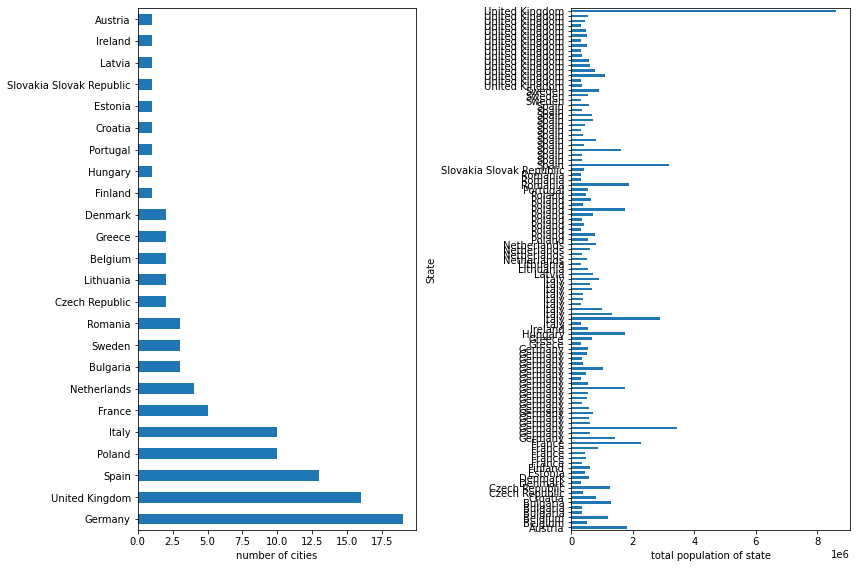

In [97]:
fig, axes=plt.subplots(1,2,figsize=(12,8))
pop.State.value_counts().plot(kind='barh',ax=axes[0])
axes[0].set_xlabel("number of cities")
pop1.NO_population.plot(kind='barh',ax=axes[1])
axes[1].set_xlabel("total population of state")
fig.tight_layout()
plt.show()